# Problem set 5 - Thomas Vandal

In [1]:
# imports for the problem set
import numpy as np

import box                   # for questions 1-4
import temperature as tempt  # for questions 5

## Setup for problems 1 to 4
For the first 4 problems, we use a 'Box' object, which is defined in box.py along with other useful methods for the different solvers. To represent a cubic box with a charged, conducting cylinder in the middle, we use a square with a circle inside in the x-y plane. This should work since the behaviour around the cylinder will be the same everywhere along the z axis. **For all 4 problems, the charge, E-field and potential were not normalized (the behavior is the same, only units and may change)**

We first initialize a box that we will use for problems 1 to 4. We can also set the convergence conditions for all 4 problems since we use them to compare the different solving methods. We also start all optimization with V = Boundary conditions by default, to have the same starting point when reaching convergence.

In [2]:
# Set the box with an arbitrary potential V=2 and a cylinder of arbitrary radius (that fits in the box).
mybox = box.Box(npix=256, radius=25, cylpot=1, edge_bc='clamped', bumploc=None, bumpfrac=None)

# Set convergence parameters.
maxit = 20000  # increase this if tol is not reached
tol = 1e-5  # decrease this for better solution (takes longer)

## Problem 1
First, we use relaxation method to solve the problem and display the solution.

The relaxation method converged after 15373 iterations in 49.217289686203 seconds.


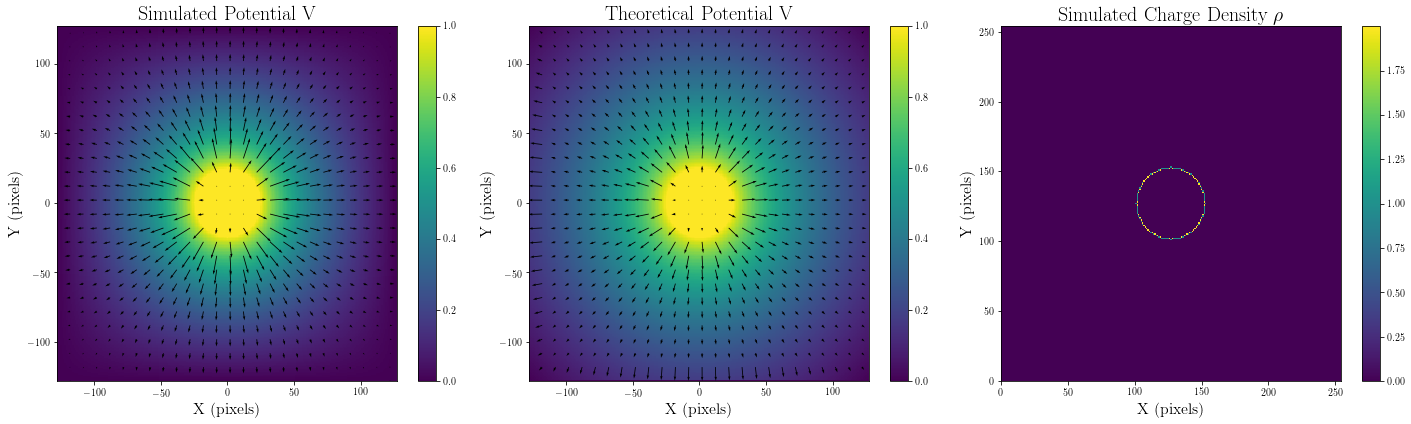

In [3]:
# Solve with relaxation method
mybox.relax(maxit=maxit, tol=tol)
rho = mybox.get_rho()

# Plot V, Vtheo, both E-fields, and tol
mybox.show_threepanels(figsize=(20, 6))

The electric field goes outward, as expected. As we see above, the charge density is all on the boundary, as expected. To get the charge per unit length, we can sum over the circle and divide by the circonference to get the charge per unit length.

In [4]:
lam = np.sum(mybox.get_rho()) / (2 * np.pi *  mybox.radius)
print('The charge per unit length is {}'.format(lam))

The charge per unit length is 1.2944692957181358


As we can see by looking at the box.py file, when we get the theoretical potential, we use the corners as a reference, and we draw a circle, so the potential does not decay exactly smoothly to 0 except at corners. However, the general behaviour of both simulated and analytic potentials are very similar (decaying from cylinder). Since the simulated potential has rougher variations, the electric field looks much less smooth than for the analytic . However, this will be fixed in the next problems (see below).

## Problem 2
The box object also has a conjugate gradient method implemented, so we use this to solve (starting at BC again, to have a fair comparison with 1).

The CG method converged after 265 iterations.
CG took 265 iterations, 0.9395136833190918 seconds


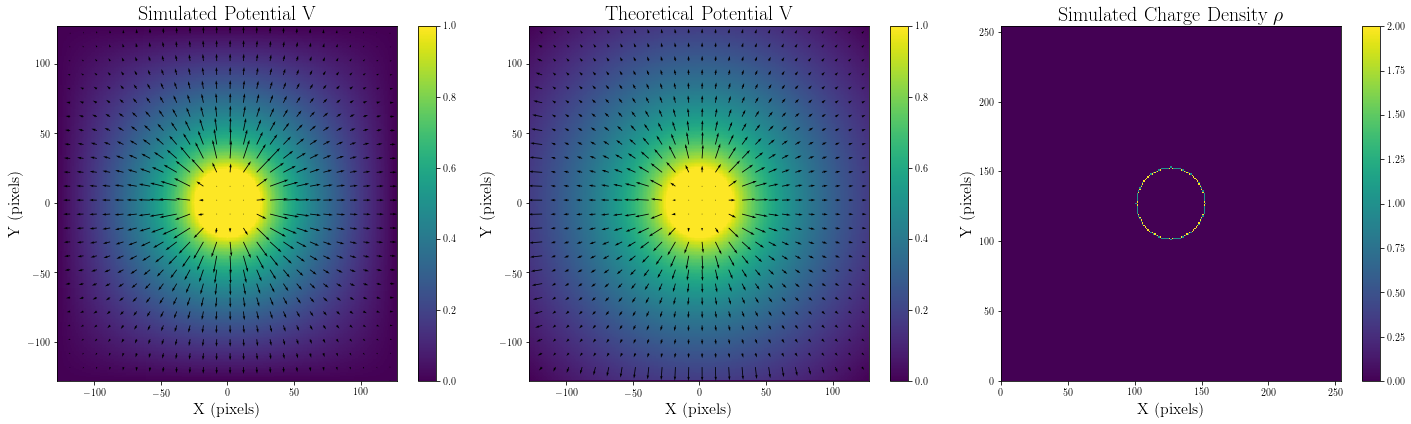

In [5]:
mybox.cg(maxit=maxit, tol=tol)
mybox.show_threepanels(figsize=(20, 6))

As indicated by the printed text, we have a smaller number of iteration and smaller time before convergence. This is also much smooter and similar to the analytic solution than part 1.

## Problem 3
The box object has a method that performs conjugate gradient, but by looping over resolutions.

The CG method converged after 4 iterations.
The CG method converged after 12 iterations.
The CG method converged after 26 iterations.
The CG method converged after 37 iterations.
The CG method converged after 44 iterations.
The CG method converged after 71 iterations.
CG took 194 total iterations, 0.3016321659088135 seconds


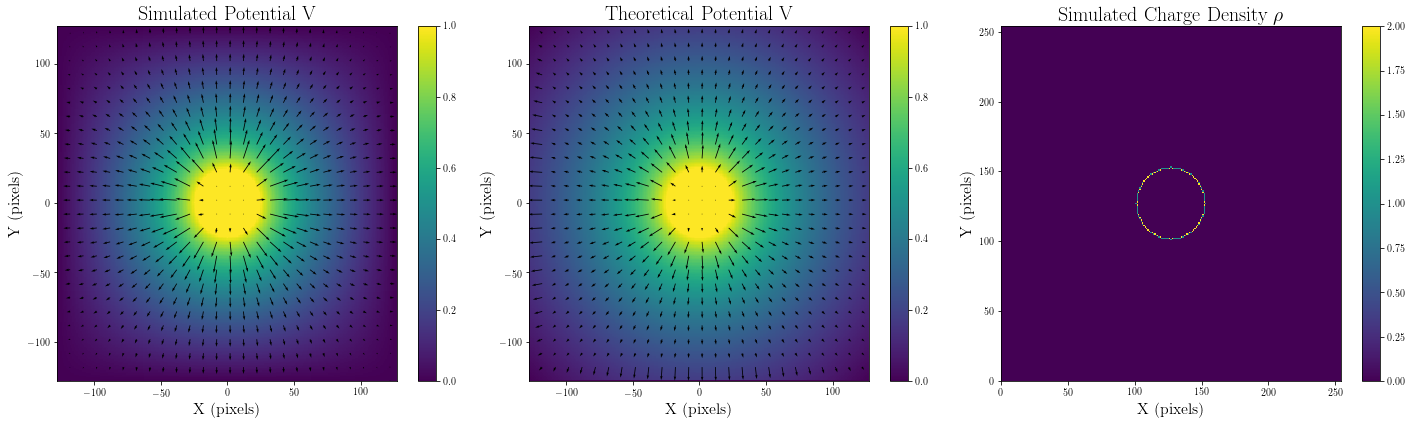

In [6]:
mybox.cgres(nres=6, maxit=maxit, tol=tol)
mybox.show_threepanels(figsize=(20, 6))

As we see above, this is much faster than both part 1 and 2. It also gives somehting closer to the analytic answer.

## Problem 4
The box object has a method to add a bump of a given radius at a given angular position on the surface, such that the circular bump is centered on the surface.

The CG method converged after 4 iterations.
The CG method converged after 12 iterations.
The CG method converged after 26 iterations.
The CG method converged after 35 iterations.
The CG method converged after 46 iterations.
The CG method converged after 70 iterations.
CG took 193 total iterations, 0.3156266212463379 seconds


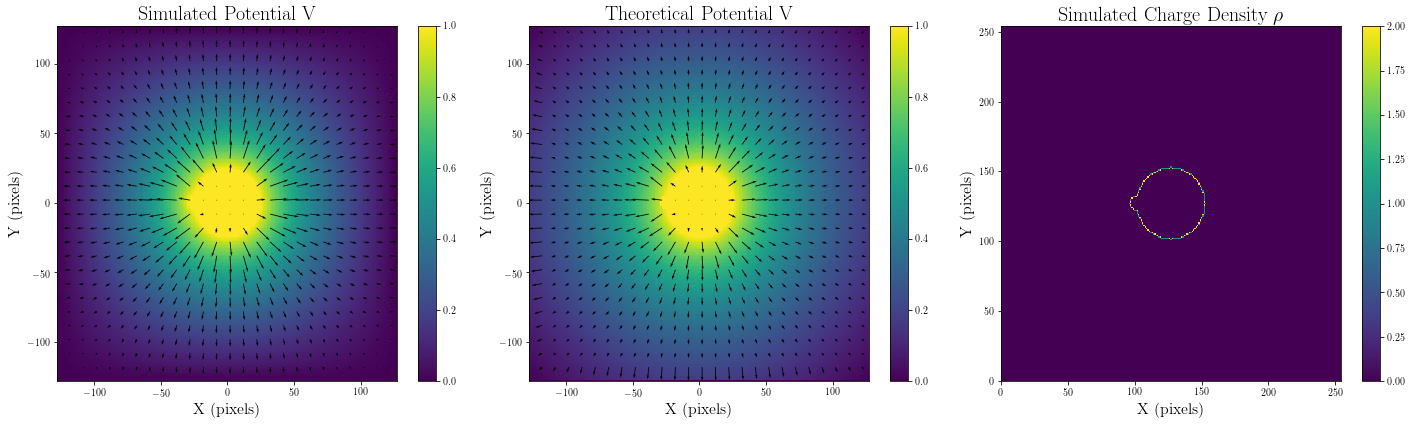

In [7]:
mybox.addbump(np.pi, 0.2)  # 10% bump, circle half out, so radius ratio is 0.2 (20%)
mybox.cgres(nres=6, maxit=maxit, tol=tol)
mybox.show_threepanels(figsize=(20, 6))

We see that there is an increase in the field near the bump (more clear if you zoom in, but we can still see it as shown above in both plots above).

## Problem 5
This problem is not related to the 4 problems above. Here, we don't define a specific object, but simply use a method to solve the Heat equation with Forward-Time-Central-Space (FTCS) method for a von Neumann condition. Here, we consider a line along the center so the problem is in 1D.

We need to define the size of the box, the total time studied, our time and spatial steps, and the constant of proportionality. We also need to set the convergence parameter to solve the PDEs (more on this below).

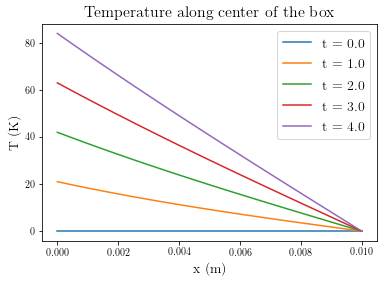

In [8]:
# use solver defined in temperature.py to solve the heat equation in a box
dt, dx = 5e-4, 5e-4  # time and space steps
k = 1e-4  # convergence coeff
xmax = 0.01  # box width
tmax = 5  # 5 seconds
const = 100

# solve pde
tvals, x, temp = tempt.solve_heat(dt, dx, k, tmax, xmax, const)
tempt.plot_heat(tvals, x, temp, sparse=tvals.size//5, keep=True)

As we see the temparture increases progressively, but the boundary of T=0 on the right keeps it fixed there, so it goes towards a linear relationship of T vs x. If the constant k is not carefully set, the solver might diverge and simply oscillate through time.